In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flo-dataset/flo_data_20k.csv


# Customer Segmentation with RFM
## 1. Business Problem

 FLO company (Retail) customers will be segmented using RFM. Customers' behaviors will be defined and groups will be formed according to these behavioral clusters. In this way, segment-specific marketing strategies can be determined.

## 2. About Dataset

 The data set consists of information obtained from the past shopping behavior of customers who made their last purchases as OmniChannel (both online and offline shoppers) in 2020 - 2021.

* **master_id:** Unique customer number
* **order_channel :** Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile, Offline)
* **last_order_channel :** The channel where the last purchase was made
* **first_order_date :** Date of the customer's first purchase
* **last_order_date :** Date of the customer's last purchase
* **last_order_date_online :** The date of the last purchase made by the customer on the online platform
* **last_order_date_offline :** Date of the last purchase made by the customer on the offline platform
* **order_num_total_ever_online :** Total number of purchases made by the customer on the online platform
* **order_num_total_ever_offline :** Total number of purchases made by the customer offline
* **customer_value_total_ever_offline :** Total price paid by the customer for offline purchases
* **customer_value_total_ever_online :** Total price paid by the customer for online purchases
* **interested_in_categories_12 :** List of categories the customer has shopped in the last 12 months


## 3. Data Preparing & Understanding

In [2]:
import datetime as dt #data processing

df_ = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv") #upload the dataset
df = df_.copy() # copy the dataset to protect original dataset
pd.set_option('display.max_columns', None) # display all columns 
pd.set_option('display.float_format', lambda x: '%.5f' % x) # show 5 digits after the dot for float numbers


In [3]:
df.head() #display first 5 columns

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00000,1.00000,139.99000,799.38000,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00000,2.00000,159.97000,1853.58000,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00000,2.00000,189.97000,395.35000,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00000,1.00000,39.99000,81.98000,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00000,1.00000,49.99000,159.99000,[AKTIFSPOR]


In [4]:
df.shape #display the shape of the dataset

(19945, 12)

In [5]:
df.columns # display the names of columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [6]:
df.describe().T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00000,3.11085,4.22565,1.00000,1.00000,2.00000,4.00000,200.00000
order_num_total_ever_offline,19945.00000,1.91391,2.06288,1.00000,1.00000,1.00000,2.00000,109.00000
customer_value_total_ever_offline,19945.00000,253.92260,301.53285,10.00000,99.99000,179.98000,319.97000,18119.14000
customer_value_total_ever_online,19945.00000,497.32169,832.60189,12.99000,149.98000,286.46000,578.44000,45220.13000


In [7]:
df.isnull().sum() #number of the null values 

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [9]:
#creating new features to prepare RFM

# combine total numbers of online and offline orders
df["order_num_total_ever_online_offline"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

# combine total values of online and offline orders
df["customer_value_total_ever_online_offline"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]


In [10]:
# Converting date columns to datetime type

date_columns = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [11]:
# Converting object data types to category types

categorical_columns = ['master_id', 'order_channel', 'last_order_channel','interested_in_categories_12']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [12]:
df.info() #check the datatype again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   master_id                                 19945 non-null  category      
 1   order_channel                             19945 non-null  category      
 2   last_order_channel                        19945 non-null  category      
 3   first_order_date                          19945 non-null  datetime64[ns]
 4   last_order_date                           19945 non-null  datetime64[ns]
 5   last_order_date_online                    19945 non-null  datetime64[ns]
 6   last_order_date_offline                   19945 non-null  datetime64[ns]
 7   order_num_total_ever_online               19945 non-null  float64       
 8   order_num_total_ever_offline              19945 non-null  float64       
 9   customer_value_total_ever_of

In [13]:
#other way to prepare data
#creating a function all the preparing steps:

def data_preparation(df,date_columns,categorical_columns):
    # data preparing
    print(df.head())
    print(df.shape)
    print(df.describe().T)
    print(df.isnull().sum())
    print(df.info())
    df["order_num_total_ever_online_offline"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    df["customer_value_total_ever_online_offline"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]
    print(df.sort_values(by="customer_value_total_ever_online_offline", ascending=False).head(10))
    print(df.sort_values(by="order_num_total_ever_online_offline", ascending=False).head(10))
    print(df[categorical_columns].value_counts())
    if len(date_columns) > 0 :
        for col in date_columns:
            df[col] = pd.to_datetime(df[col])
    if len(categorical_columns) > 0 :
        for col in categorical_columns:
            df[col] = df[col].astype('category')
    print(df.info())
    return df


date_columns = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
categorical_columns = ['master_id', 'order_channel', 'last_order_channel','interested_in_categories_12']
data_preparation(df,date_columns,categorical_columns)

                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   

  first_order_date last_order_date last_order_date_online  \
0       2020-10-30      2021-02-26             2021-02-21   
1       2017-02-08      2021-02-16             2021-02-16   
2       2019-11-27      2020-11-27             2020-11-27   
3       2021-01-06      2021-01-17             2021-01-17   
4       2019-08-03      2021-03-07             2021-03-07   

  last_order_date_offline  order_num_total_ever_online  \
0              2021-02-26                      4.00000   
1              2020-01-10                     19.00000   
2 

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_online_offline,customer_value_total_ever_online_offline
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00000,1.00000,139.99000,799.38000,[KADIN],5.00000,939.37000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00000,2.00000,159.97000,1853.58000,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00000,2013.55000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00000,2.00000,189.97000,395.35000,"[ERKEK, KADIN]",5.00000,585.32000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00000,1.00000,39.99000,81.98000,"[AKTIFCOCUK, COCUK]",2.00000,121.97000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00000,1.00000,49.99000,159.99000,[AKTIFSPOR],2.00000,209.98000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.00000,2.00000,289.98000,111.98000,"[ERKEK, AKTIFSPOR]",3.00000,401.96000
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.00000,1.00000,150.48000,239.99000,[AKTIFSPOR],2.00000,390.47000
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.00000,1.00000,139.98000,492.96000,[AKTIFSPOR],3.00000,632.94000
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.00000,5.00000,711.79000,297.98000,"[ERKEK, AKTIFSPOR]",6.00000,1009.77000


## 4. Calculation of RFM Metrics

In [14]:
# we defined 2 days after the last order date as the analysis date

today_date = df["last_order_date"].max() + dt.timedelta(days=2)

In [15]:
#calculating recency

df["recency"] = (today_date - df["last_order_date"]).dt.days

In [16]:
#creating new dataframe to calculate rfm score

rfm = df[["master_id","recency","order_num_total_ever_online_offline","customer_value_total_ever_online_offline","interested_in_categories_12"]]


In [17]:
#changing names of the columns

rfm.columns = ['master_id', 'recency', 'frequency', 'monetary','interested_in_categories_12']
rfm.head() #display first 5 rows

,master_id,recency,frequency,monetary,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00000,939.37000,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00000,2013.55000,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00000,585.32000,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00000,121.97000,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00000,209.98000,[AKTIFSPOR]


## 5. Calculation of RFM Scores

In [18]:
# RFM metrics are scored with 5 numbers (5 is the best, 1 is the worst)

rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels = [1, 2, 3, 4, 5])

/tmp/ipykernel_18/376938019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5, 4, 3, 2, 1])
/tmp/ipykernel_18/376938019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
/tmp/ipykernel_18/376938019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [19]:
# combine the scores to create RFM scores

rfm["RFM_Score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm["RF_Score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

/tmp/ipykernel_18/1662987518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["RFM_Score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)
/tmp/ipykernel_18/1662987518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["RF_Score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)


## 6. RFM Scores Segmentation

**The table to create segmentation with RF scores**
* Let's create customer segmentation which we use this table below. 

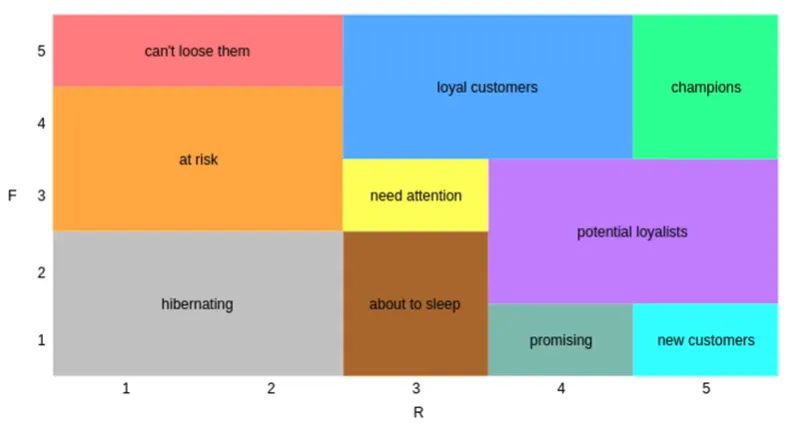



In [20]:
#creating segmantations map with regex

seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_risk',
           r'[1-2]5' : 'cant_lose',
           r'3[1-2]' : 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]':'potential_loyalists',
           r'5[4-5]': 'champions'}

In [21]:
#creating segmentations 

rfm['segment'] = rfm['RF_Score'].replace(seg_map, regex=True)
rfm.head()

/tmp/ipykernel_18/3532282789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['segment'] = rfm['RF_Score'].replace(seg_map, regex=True)


,master_id,recency,frequency,monetary,interested_in_categories_12,recency_score,frequency_score,monetary_score,RFM_Score,RF_Score,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00000,939.37000,[KADIN],3,4,4,344,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00000,2013.55000,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",3,5,5,355,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00000,585.32000,"[ERKEK, KADIN]",2,4,3,243,24,at_risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00000,121.97000,"[AKTIFCOCUK, COCUK]",3,1,1,311,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00000,209.98000,[AKTIFSPOR],3,1,1,311,31,about_to_sleep


## 7. Analysis & Filtering 

In [22]:
#checking recency,frequnecy and monetary mean of segments


rfm[["segment","recency","frequency","monetary"]].groupby(["segment"]).agg({"recency":"mean",
                                                                            "frequency":"mean",
                                                                            "monetary":"mean"})
                                                                                      

,recency,frequency,monetary
segment,,,
about_to_sleep,113.78514,2.40147,359.00896
at_risk,241.60683,4.47237,646.61024
cant_lose,235.44417,10.69833,1474.46822
champions,17.10663,8.93427,1406.62511
hibernating,247.94950,2.39401,366.26706
loyal_customers,82.59476,8.37459,1216.81862
need_attention,113.82868,3.72783,562.14296
new_customers,17.91765,2.00000,339.95554
potential_loyalists,37.15589,3.30429,533.18447


In [23]:
#filtering and creating a new dataframe

new_df = pd.DataFrame()

new_df["customer_id"]= rfm[((rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")) & (rfm["interested_in_categories_12"].str.contains("KADIN")) ][["master_id"]]

new_df.head()

,customer_id
0,cc294636-19f0-11eb-8d74-000d3a38a36f
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11,c2e15af2-9eed-11e9-9897-000d3a38a36f
33,fb840306-1219-11ea-a001-000d3a38a36f


In [24]:
#filtering and creating a new dataframe

new_df_2 = pd.DataFrame()

new_df_2["customer_id"] = rfm[((rfm["segment"] == "cant_lose") | (rfm["segment"] == "about_to_sleep") | (rfm["segment"] == "new_customers")) & ((rfm["interested_in_categories_12"].str.contains("ERKEK")) | (rfm["interested_in_categories_12"].str.contains("COCUK")))][["master_id"]]

new_df_2.head()

,customer_id
3,1854e56c-491f-11eb-806e-000d3a38a36f
15,13ed97a4-b167-11e9-89fa-000d3a38a36f
23,4fbb0cbe-9085-11ea-af25-000d3a38a36f
34,1acf7870-87af-11ea-ace9-000d3a38a36f
56,92a334ee-58f2-11eb-9e65-000d3a38a36f
